# Teleportation

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import random_state

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

## Teleportation

In [8]:
def teleportIt():
    qr = QuantumRegister(3)
    crx, crz = ClassicalRegister(1), ClassicalRegister(1)
    circ = QuantumCircuit(qr, crz, crx)
    
    ### Random initial state for Alice's personal qubit
    w = random_state(1)
    circ.append(extensions.Initialize(w), [0])
    ### End
    
    circ.barrier()
    circ.h(1)
    circ.cx(1,2)
    circ.barrier()
    
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(range(0, 2), range(0, 2))
    
    # Alice send qubit
    circ.barrier()
    circ.x(2).c_if(crx, 1) # Enable this gate if crx = 1
    circ.z(2).c_if(crz, 1) # Enable this gate if crz = 1
    
    return circ, w

In [15]:
circ, w = teleportIt()

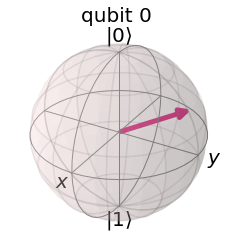

In [16]:
visualization.plot_bloch_multivector(w);

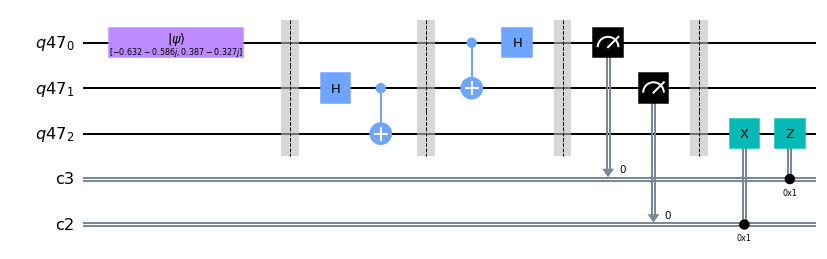

In [17]:
circ.draw();

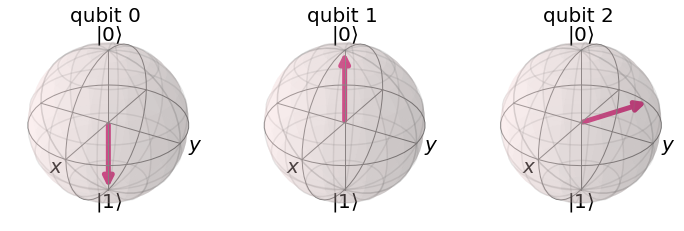

In [19]:
getBloch(circ); # Teleport quantum state from q0 to q2 (not violate No cloning theorem)